In [2]:
## Topic Modling to disover the topics in the text
# -*- coding: utf-8 -*-
## porting code from discoery.ipynb

## importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For wordcloud stuff
import nltk
from nltk.corpus import stopwords
import string
import re
import wordcloud


from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline



In [15]:

## Load the data 

# Load the data

df = pd.read_csv('data/corpus_df_reddit.csv')

# drop the label column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Check the shape of the data
print('The shape of the data is:\n', df.shape)
print("\n")
# Check the first few rows of the data

# Check the columns of the data
print('The columns of the data are:', df.columns)
print("\n")


# Check the number of missing values in each column
print('The number of missing values in each column are:\n', df.isnull().sum())
print("\n")

# Check the number of unique values in each column
print('The number of unique values in each column are:\n', df.nunique())

# Check the data types of the columns
print('The data types of the columns are:\n', df.dtypes)
print("\n")







The shape of the data is:
 (35, 1000)


The columns of the data are: Index(['able', 'absolute', 'absolutely', 'according', 'account', 'act',
       'action', 'actively', 'actual', 'actually',
       ...
       'wrong', 'www', 'x', 'y', 'yeah', 'year', 'years', 'yes', 'young',
       'zero'],
      dtype='object', length=1000)


The number of missing values in each column are:
 able          0
absolute      0
absolutely    0
according     0
account       0
             ..
year          0
years         0
yes           0
young         0
zero          0
Length: 1000, dtype: int64


The number of unique values in each column are:
 able           5
absolute       4
absolutely     4
according      3
account        4
              ..
year          10
years         17
yes            8
young          4
zero           5
Length: 1000, dtype: int64
The data types of the columns are:
 able          int64
absolute      int64
absolutely    int64
according     int64
account       int64
              ..

In [21]:
df.head(5)  

,able,absolute,absolutely,according,account,act,action,actively,actual,actually,...,wrong,www,x,y,yeah,year,years,yes,young,zero
0,1,1,1,0,0,1,0,0,2,4,...,2,1,0,0,3,0,2,0,0,0
1,0,1,0,1,0,2,1,0,0,6,...,2,2,0,0,1,7,15,0,1,0
2,2,1,1,0,0,0,1,1,0,7,...,8,4,0,1,1,0,17,1,0,1
3,0,1,0,0,0,0,4,2,0,4,...,3,4,0,0,2,1,7,0,0,0
4,1,0,1,0,0,1,0,0,1,3,...,1,4,0,1,2,6,9,2,0,1


In [27]:
## based off of our df that is already cleaned and vecotorized we need to make the lda model
# we neeed to standardize the data


# fit the vectorizer to the data
# Assuming the data is already vectorized and stored in df
X = df.values

# create lda model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
# fit the model to the data
lda.fit(X)
# print the model
print(lda)
# print the components
print(lda.components_)
# print the shape of the components
print(lda.components_.shape)


# Visualize the topics to show major themes in these words!

# Create a function to display the topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print()
# Create a function to display the topics


LatentDirichletAllocation(n_components=5, random_state=42)
[[ 0.20171871  0.20026474  2.86951379 ...  0.20113301  0.20153211
   0.2025007 ]
 [ 8.68338337  2.23668416  2.29392616 ... 16.07332229  3.4185274
  12.05418425]
 [ 0.20499125  6.84349181  2.25305939 ...  0.51368114  0.20270197
   0.2030801 ]
 [ 1.20001922  2.67222265  3.15599844 ...  2.02856473  0.20000043
   0.20000039]
 [11.70988745  5.04733665  8.42750221 ... 39.18329883  7.97723809
   8.34023456]]
(5, 1000)


In [29]:
display_topics(lda, df.columns, 15)

Topic 0:
s high florida speed t rail just train like climate change going government pg floridians
Topic 1:
s energy nuclear t power just like years https climate planet people change civilization growth
Topic 2:
s t people like just guy good know don company m ai right patagonia think
Topic 3:
s climate change people t just migration world god like going don immigration frank https
Topic 4:
s climate t change people like just years don m think going time water year



In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import numpy as np
import os

# Step 1: Load all text files from a directory
folder_path = "./data/text_corpus/"
documents = []

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as f:
            documents.append(f.read())

# Step 1(again): Vectorize the original text (if not already done)
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(documents)  # Replace 'text' with your actual column

# Step 2: Fit the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Step 3: Build all inputs from the SAME vectorizer and matrix
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
doc_topic_dists = lda.transform(X)
doc_lengths = np.sum(X, axis=1).A1  # if sparse
term_frequency = np.array(X.sum(axis=0)).flatten()
vocab = vectorizer.get_feature_names_out()

# Step 4: Visualize
panel = pyLDAvis.prepare(
    topic_term_dists=topic_term_dists,
    doc_topic_dists=doc_topic_dists,
    doc_lengths=doc_lengths,
    vocab=vocab,
    term_frequency=term_frequency
)

pyLDAvis.display(panel)
## Save the visualization
# pyLDAvis.save_html(panel, 'lda_visualization.html')

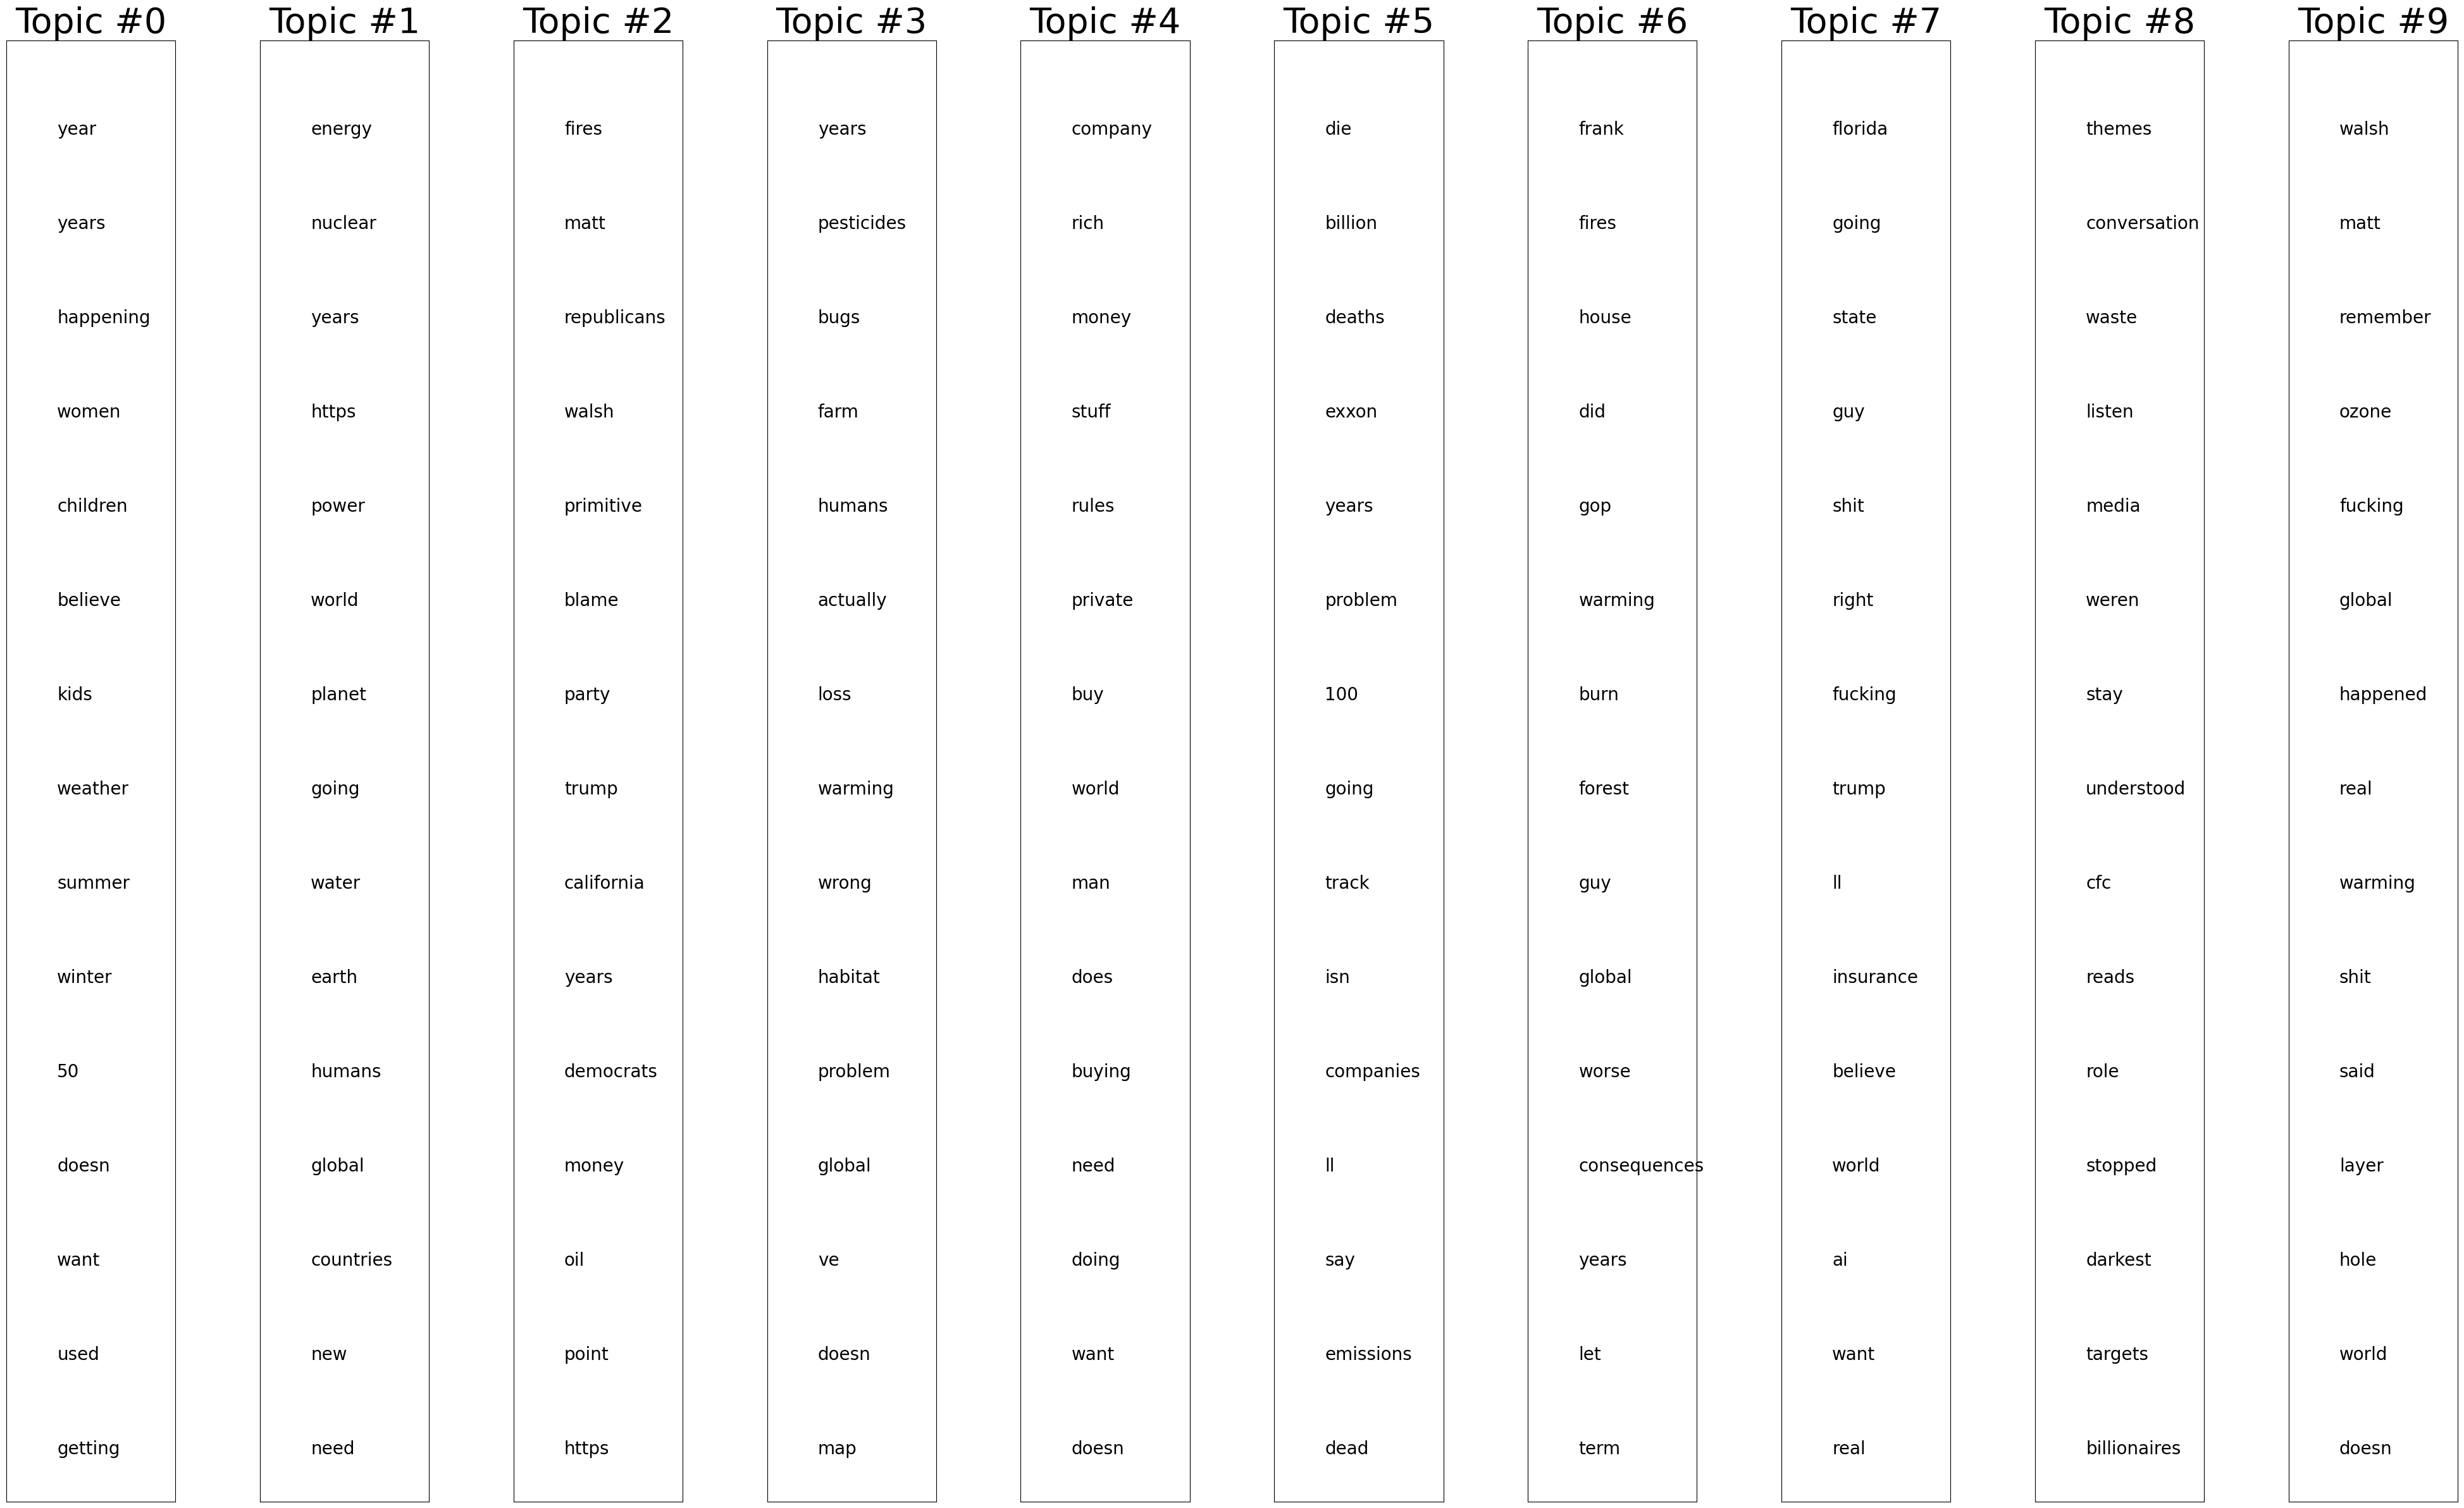

In [55]:
NUM_TOPICS = lda.n_components
num_top_words = 15

# Get the matrix of word importance per topic
word_topic = np.array(lda.components_)
word_topic = word_topic.transpose()  # shape = (vocab size, num topics)

# Get vocabulary
vocab_array = np.array(vectorizer.get_feature_names_out())

# Create the figure
plt.figure(figsize=(50, 30))
fontsize_base = 40

# One subplot per topic
for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)
    plt.ylim(0, num_top_words + 0.5)
    plt.xticks([])
    plt.yticks([])
    plt.title('Topic #{}'.format(t), fontsize=fontsize_base)

    # Top word indices for this topic
    top_words_idx = np.argsort(word_topic[:, t])[::-1][:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]

    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words - i - 0.5, word, fontsize=fontsize_base / 2)



plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig('lda_topics.png', bbox_inches='tight')  

plt.show()
# Save the figure   

